# HIV MODEL
Chris Lee

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [13]:
def make_system(alpha, beta, delta, gamma, mu, pi, rho, sigma, tau):
    """Make a system object for the HIV model.
    
    alpha: rate at which lymphocytes switch from latent to active
    beta: rate of infection of lymphocytes per virion
    delta: rate of removal of infected cells
    gamma: rate at which new, uninfected CD4 lymphocytes arise
    mu: death rate of lymphocytes
    pi: free virion production rate
    sigma: rate of removal of free virions
    tau: proportion of lymphocytes that are activated
    
    returns: System object
    """
    init = State(R=1000, L=0, E=0, V=100)
    
    #R = lymphocyts
    #L = Latent Infected
    #E = Actively Infected
    #V = Free Virions
    
    t0 = 0
    t_end = 120

    return System(init=init, t0=t0, t_end=t_end, 
                  alpha=alpha, beta=beta, 
                  delta=delta, gamma=gamma, 
                  mu=mu, pi=pi, rho = rho, sigma=sigma, 
                  tau=tau)
sys = make_system(3.6*10e-2, .00027, .33, 1.36, 1.36e-3, 100, .1, 2, .2)

,values
init,R 1000 L 0 E 0 V 100 dtype:...
t0,0
t_end,120
alpha,0.36
beta,0.00027
delta,0.33
gamma,1.36
mu,0.00136
pi,100
rho,0.1


In [14]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: State (rlev)
    """
    r, l, e, v = state
    unpack(system)
    
    dt = 1/(t_end/120)
    BRV = beta*v*r
    delta_lymphocytes = ((gamma*tau) - (mu*r) - BRV) * dt
    delta_latent = ((rho*BRV) - (mu*l) - (alpha*l)) * dt
    delta_active = (((1-rho)*BRV) + (alpha*l) - (delta*e)) * dt
    delta_virions = ((pi*e) - (sigma*v)) * dt
    
    r += delta_lymphocytes
    l += delta_latent
    e += delta_active
    v += delta_virions
    
    return State(R=r, L=l, E=e, V=v)

In [15]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [16]:
def plot_results(r, l, e, v):
    """Plot the results of a SIR model.
    
    r, l, e, v: timeseries
    """
    plot(r, 'r-', label='Lymphocytes')
    plot(l, 'b-', label='Latent Infected')
    plot(e, 'g-', label='Activated Infected')
    plot(v, 'y-', label='Free Virions')
    
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [17]:
results = run_simulation(sys, update_func)

,R,L,E,V
0,1000,0,0,100
1,971.912,2.7,24.3,-100
2,997.104,-0.899834,-6.36446,2530
3,314.898,67.5375,608.421,-3166.45
4,583.961,16.2102,189.659,64008.6
5,-9508.76,1019.57,9215.89,-45042.7
6,-125137,12215.3,110619,966631
7,3.25345e+07,-3.25815e+06,-2.9315e+07,1.00952e+07
8,-8.86473e+10,8.8659e+09,7.9791e+10,-2.9416e+09
9,-7.04066e+16,7.04065e+15,6.33659e+16,7.98204e+12


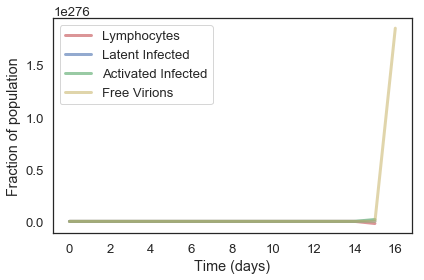

In [18]:
plot_results(results.R, results.L, results.E, results.V)

In [19]:
def slope_func(state, t, system):
    """
    Outputs slope of each type per time step
    
    system: System object
    t: time step
    state: State (R, L, E, V)
    """
    unpack(system)
    r, l, e, v = state
    
    drdt = gamma*tau - mu*r - beta*v*r
    dldt = rho*beta*r*v - mu*gamma - alpha*l
    dedt = (1-rho)*beta*r*v + alpha*l - delta*e
    dvdt = pi*e - sigma*v
    
    return drdt, dldt, dedt, dvdt

In [20]:
results, details = run_ode_solver(sys, slope_func)
details

,values
sol,None
t_events,[]
nfev,776
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


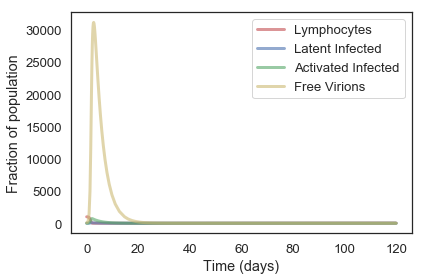

In [21]:
plot_results(results.R, results.L, results.E, results.V)